In [71]:
import keras
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import distplot
import interface
import tensorflow as tf
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import os

In [72]:

df = pd.read_csv('system-1.csv', parse_dates=['timestamp'], index_col='timestamp')

/var/folders/mx/k43bkc096b5652hbnj_yq12h0000gn/T/ipykernel_35286/2106815844.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('system-1.csv', parse_dates=['timestamp'], index_col='timestamp')


In [73]:
df.head()

,load-1m,load-5m,load-15m,sys-mem-swap-total,sys-mem-swap-free,sys-mem-free,sys-mem-cache,sys-mem-buffered,sys-mem-available,sys-mem-total,...,sys-thermal,disk-io-time,disk-bytes-read,disk-bytes-written,disk-io-read,disk-io-write,cpu-iowait,cpu-system,cpu-user,server-up
timestamp,,,,,,,,,,,,,,,,,,,,,
0,0.22,0.18,0.18,16953372672,16953372672,2071302144,10307330048,1937584128,15328792576,16662700032,...,1.60,0.0076,0.0,16588.8,0.0,2.10,0.0095,0.0240,0.0405,2
30,0.26,0.19,0.18,16953372672,16953372672,2072969216,10307371008,1937584128,15330496512,16662700032,...,0.00,0.0060,0.0,14745.6,0.0,1.50,0.0125,0.0270,0.0475,2
60,0.16,0.17,0.18,16953372672,16953372672,2071818240,10307375104,1937584128,15329353728,16662700032,...,0.00,0.0134,0.0,15564.8,0.0,1.65,0.0135,0.0255,0.0260,2
90,0.16,0.17,0.18,16953372672,16953372672,2071830528,10307379200,1937584128,15329370112,16662700032,...,0.00,0.0078,0.0,16179.2,0.0,1.80,0.0160,0.0305,0.0315,2
120,0.10,0.15,0.17,16953372672,16953372672,2071859200,10307379200,1937584128,15329398784,16662700032,...,1.55,0.0066,0.0,13721.6,0.0,1.70,0.0080,0.0225,0.0270,2


In [74]:
df.shape

(85749, 23)

In [75]:
train_size = int(len(df) * .95)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(train.shape, test.shape )

(81461, 23) (4288, 23)


In [76]:
scaler = StandardScaler()
scaler = scaler.fit(train.iloc[:, 1:])
train.head()

,load-1m,load-5m,load-15m,sys-mem-swap-total,sys-mem-swap-free,sys-mem-free,sys-mem-cache,sys-mem-buffered,sys-mem-available,sys-mem-total,...,sys-thermal,disk-io-time,disk-bytes-read,disk-bytes-written,disk-io-read,disk-io-write,cpu-iowait,cpu-system,cpu-user,server-up
timestamp,,,,,,,,,,,,,,,,,,,,,
0,0.22,0.18,0.18,16953372672,16953372672,2071302144,10307330048,1937584128,15328792576,16662700032,...,1.60,0.0076,0.0,16588.8,0.0,2.10,0.0095,0.0240,0.0405,2
30,0.26,0.19,0.18,16953372672,16953372672,2072969216,10307371008,1937584128,15330496512,16662700032,...,0.00,0.0060,0.0,14745.6,0.0,1.50,0.0125,0.0270,0.0475,2
60,0.16,0.17,0.18,16953372672,16953372672,2071818240,10307375104,1937584128,15329353728,16662700032,...,0.00,0.0134,0.0,15564.8,0.0,1.65,0.0135,0.0255,0.0260,2
90,0.16,0.17,0.18,16953372672,16953372672,2071830528,10307379200,1937584128,15329370112,16662700032,...,0.00,0.0078,0.0,16179.2,0.0,1.80,0.0160,0.0305,0.0315,2
120,0.10,0.15,0.17,16953372672,16953372672,2071859200,10307379200,1937584128,15329398784,16662700032,...,1.55,0.0066,0.0,13721.6,0.0,1.70,0.0080,0.0225,0.0270,2


In [77]:
train.iloc[:, 1:] = scaler.transform(train.iloc[:, 1:])
test.iloc[:, 1:] = scaler.transform(test.iloc[:, 1:])
train.head()

/var/folders/mx/k43bkc096b5652hbnj_yq12h0000gn/T/ipykernel_35286/2801525114.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.77893508 0.77893508 0.77893508 ... 0.77893508 0.77893508 0.77893508]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train.iloc[:, 1:] = scaler.transform(train.iloc[:, 1:])
/var/folders/mx/k43bkc096b5652hbnj_yq12h0000gn/T/ipykernel_35286/2801525114.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.59593867 -0.59545532 -0.59578904 ...  0.55596929  0.55630419
  0.55606311]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train.iloc[:, 1:] = scaler.transform(train.iloc[:, 1:])
/var/folders/mx/k43bkc096b5652hbnj_yq12h0000gn/T/ipykernel_35286/2801525114.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will

,load-1m,load-5m,load-15m,sys-mem-swap-total,sys-mem-swap-free,sys-mem-free,sys-mem-cache,sys-mem-buffered,sys-mem-available,sys-mem-total,...,sys-thermal,disk-io-time,disk-bytes-read,disk-bytes-written,disk-io-read,disk-io-write,cpu-iowait,cpu-system,cpu-user,server-up
timestamp,,,,,,,,,,,,,,,,,,,,,
0,0.22,0.509651,1.078261,0,0.778935,-0.595939,0.533089,0.425248,-1.494703,0,...,1.222928,-0.000339,-0.013555,-0.059757,-0.010578,0.110121,-0.058200,-0.465812,-0.254375,0.008583
30,0.26,0.598538,1.078261,0,0.778935,-0.595455,0.533104,0.425248,-1.484843,0,...,-0.824515,-0.098341,-0.013555,-0.064151,-0.010578,-0.043495,0.137961,-0.325459,-0.168283,0.008583
60,0.16,0.420764,1.078261,0,0.778935,-0.595789,0.533106,0.425248,-1.491456,0,...,-0.824515,0.354920,-0.013555,-0.062198,-0.010578,-0.005091,0.203348,-0.395636,-0.432709,0.008583
90,0.16,0.420764,1.078261,0,0.778935,-0.595785,0.533107,0.425248,-1.491361,0,...,-0.824515,0.011912,-0.013555,-0.060734,-0.010578,0.033313,0.366815,-0.161712,-0.365065,0.008583
120,0.10,0.242991,0.944919,0,0.778935,-0.595777,0.533107,0.425248,-1.491195,0,...,1.158945,-0.061590,-0.013555,-0.066592,-0.010578,0.007710,-0.156280,-0.535989,-0.420410,0.008583


In [78]:
def create_dataset(X, y, time_steps=2880):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i: (i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])

    return np.array(Xs), np.array(ys)

In [79]:
TIME_STEPS = 30

X_train, y_train = create_dataset(train.iloc[:, 1:], train.iloc[:, 0], TIME_STEPS)
X_test, y_test = create_dataset(test.iloc[:, 1:], test.iloc[:, 0], TIME_STEPS)

In [80]:
X_train.shape


(81431, 30, 22)

AUTOENCODER - LSTM

In [81]:
model = keras.Sequential()
model.add(keras.layers.LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2] )))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.RepeatVector(n=X_train.shape[1]))

model.add(keras.layers.LSTM(units=64, return_sequences=True))#Added layer
model.add(keras.layers.Dropout(rate=0.2)) #Added layer

model.add(keras.layers.TimeDistributed(keras.layers.Dense(1)))

#compile using mean absolute error

model.compile(loss='mae', optimizer='adam')

/Library/Python/3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [82]:
history = model.fit(
    X_train, y_train,
    epochs=3,
    batch_size=30,
    validation_split=0.1,
    shuffle=False #not shuffle time series data because it is history dependant!!!!
)

Epoch 1/3
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - loss: 0.0987 - val_loss: 0.0907
Epoch 2/3
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 30s 12ms/step - loss: 0.0931 - val_loss: 0.0898
Epoch 3/3
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 29s 12ms/step - loss: 0.0927 - val_loss: 0.0886


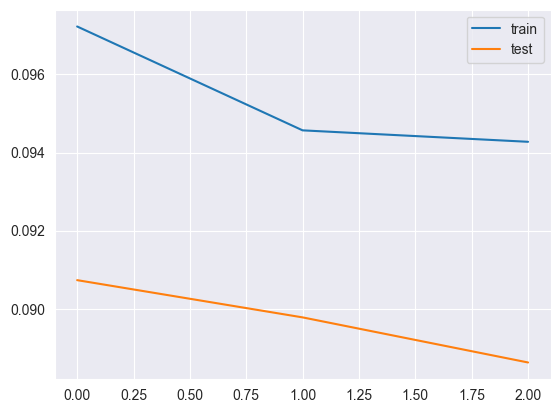

In [83]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [84]:
X_train_pred = model.predict(X_train)

2545/2545 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


In [85]:
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

In [86]:
train_mae_loss.shape

(81431, 22)

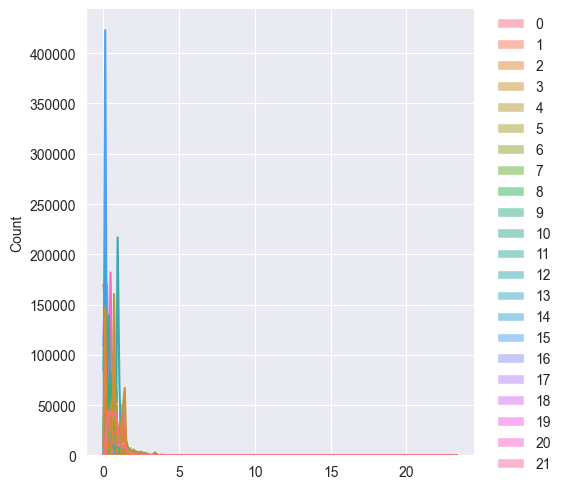

In [87]:
sns.displot(train_mae_loss, bins=50, kde=True)#ON TRAIN DATA
#According to the video, we can declare anything below or above a certain error value to be an anomaly

In [88]:
X_test_pred = model.predict(X_test)
test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Threshold: 1.9280210449238933
Modifying index: 4000
Original value: [[-5.56990050e-01 -5.21839963e-01  0.00000000e+00  7.78935082e-01
   7.01593842e-01 -6.64706328e-01 -9.70812954e-01 -4.66324686e-01
   0.00000000e+00 -1.64745337e-01 -2.98898396e-01 -4.95766748e-01
  -8.24514502e-01  1.19116159e-02 -1.35553527e-02 -5.14582159e-02
  -1.05779587e-02 -1.78922662e-02 -5.81996843e-02 -4.65812477e-01
  -2.91271610e-01  8.58255808e-03]
 [-4.68103273e-01 -3.88498249e-01  0.00000000e+00  7.78935082e-01
   7.01381263e-01 -6.64692864e-01 -9.70812954e-01 -4.70377804e-01
   0.00000000e+00 -1.64745337e-01 -2.19882634e-01 -2.98732938e-01
  -8.24514502e-01 -3.38685936e-04 -1.35553527e-02 -5.48754718e-02
  -1.05779587e-02  3.33129134e-02  2.68734905e-01 -4.19027838e-01
  -1.74432317e-01  8.58255808e-03]
 [-5.56990050e-01 -5.21839963e-01  0.00000000e+00  7.78935082e-01
   7.01179373e-01 -6.64682393e-01 -9.70812954e-01 -4.74265006e-01
   0.00000000e+00 -1.83657349e-01 -2.27654676e-01 -4.53133174e-01
  -8

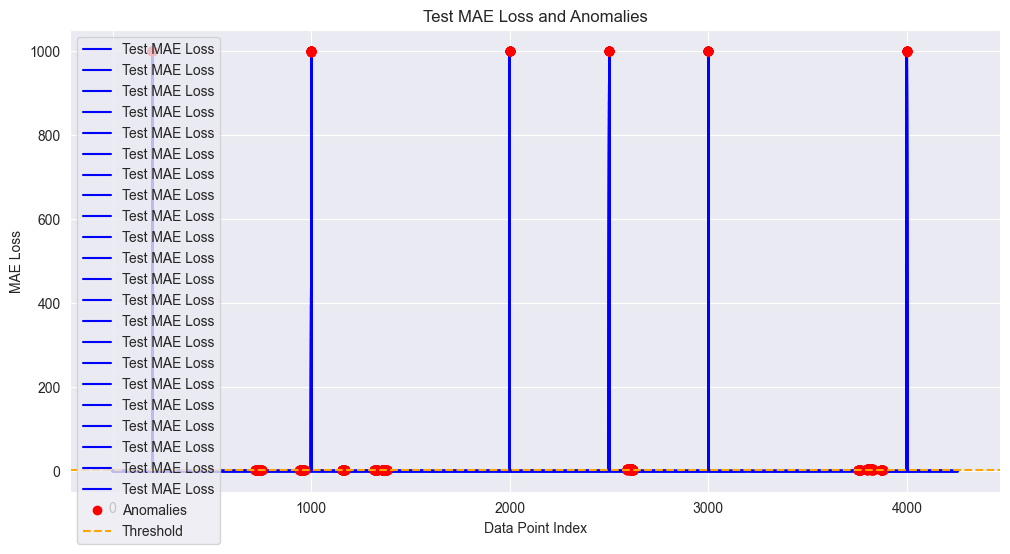

Threshold: 1.9280210449238933
MAE Loss at index 2000: [0.7829918  0.29817315 0.06009998 0.71883511 0.60539528 0.57825437
 1.05293341 1.09767817 0.06009998 0.22295572 0.33615169 0.53840296
 0.8927852  0.17687317 0.07365533 0.13751318 0.07067793 0.28409418
 0.21878579 0.52124107 0.45878367 0.05151742]


In [100]:
# Step 1: Define a threshold
threshold = np.mean(train_mae_loss) + 3 * np.std(train_mae_loss)
print(f"Threshold: {threshold}")



# Modify a specific index in X_test
index_to_modify = 4000  # Pick the index you want to modify
print(f"Modifying index: {index_to_modify}")

# Store the original value for reference
original_value = X_test[index_to_modify].copy()

# Change the value to something unusual
X_test[index_to_modify] = np.random.normal(loc=1000, scale=1, size=X_test[index_to_modify].shape)
print(f"Original value: {original_value}")
print(f"Modified value: {X_test[index_to_modify]}")

# Recompute the predictions and MAE loss
X_test_pred = model.predict(X_test)
test_mae_loss_new = np.mean(np.abs(X_test_pred - X_test), axis=1)


# Step 2: Identify anomalies
anomalies = test_mae_loss_new > threshold

# Step 3: Plot the MAE loss with the threshold and anomalies
plt.figure(figsize=(12, 6))

# Plot the MAE loss for all test data
plt.plot(test_mae_loss_new, label="Test MAE Loss", color='blue')

# Highlight anomalies
plt.plot(np.where(anomalies)[0], test_mae_loss_new[anomalies], 'ro', label="Anomalies")

# Add threshold line
plt.axhline(y=threshold, color='orange', linestyle='--', label="Threshold")

# Add labels and legend
plt.title("Test MAE Loss and Anomalies")
plt.xlabel("Data Point Index")
plt.ylabel("MAE Loss")
plt.legend()
plt.show()

print(f"Threshold: {threshold}")
print(f"MAE Loss at index 2000: {test_mae_loss[2000]}")
